In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Loan_Data.csv')
print(df.shape)
df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
for c in df.columns:
    na_count = df[c].isna().sum()
    print(c, na_count)

Loan_ID 0
Gender 13
Married 3
Dependents 15
Education 0
Self_Employed 32
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50
Property_Area 0
Loan_Status 0


In [4]:
df = df.drop(columns=('Loan_ID'))
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(2)
df.shape

(614, 12)

In [5]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
df['Loan_Status'] = df.apply(lambda x: 1 if x['Loan_Status']=='Y' else 0, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [8]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Education'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Property_Area'].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [9]:
df['Gender'] = df.apply(lambda x: 1 if x['Gender']=='Male' else 0, axis=1)
df['Married'] = df.apply(lambda x: 1 if x['Married']=='Yes' else 0, axis=1)
df['Education'] = df.apply(lambda x: 1 if x['Education']=='Graduate' else 0, axis=1)
df['Self_Employed'] = df.apply(lambda x: 1 if x['Self_Employed']=='Yes' else 0, axis=1)
df['Dependents'] = df.apply(lambda x: '3' if x['Dependents']=='3+' else x['Dependents'], axis=1)
df['Dependents'] = df['Dependents'].astype('int32')
df['Credit_History']=df['Credit_History'].astype('int32')

In [10]:
area_dummy=pd.get_dummies(df.Property_Area, drop_first=False)
df = pd.concat([df,area_dummy], axis=1)
df=df.drop(columns=['Property_Area'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1,1,0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,1,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1,1,0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1,1,0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1,1,0,0,1


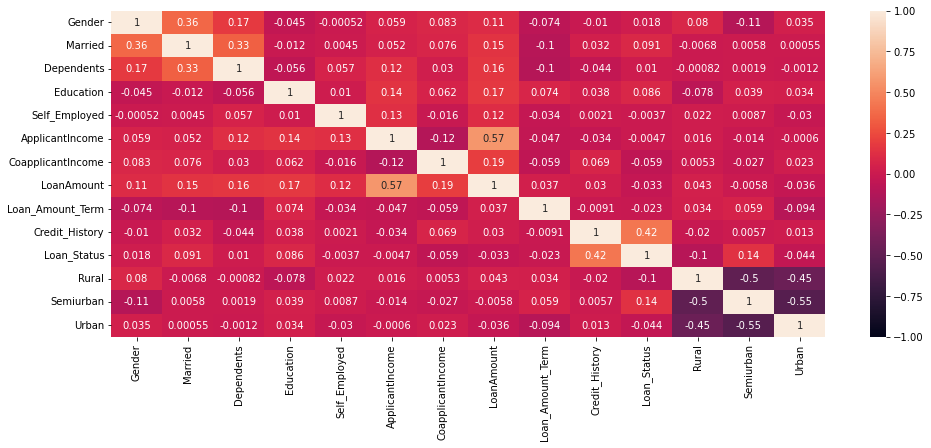

In [11]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

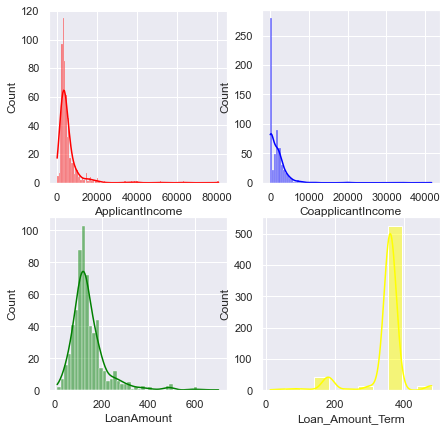

In [12]:
# Distribution of numerical features:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(7,7))
sns.histplot(df['ApplicantIncome'], kde=True, ax=axs[0,0], color='red')
sns.histplot(df['CoapplicantIncome'], kde=True, ax=axs[0,1], color='blue')
sns.histplot(df['LoanAmount'], kde=True, ax=axs[1,0], color='green')
sns.histplot(df['Loan_Amount_Term'], kde=True, ax=axs[1,1], color='yellow')

In [13]:
# Normalize these strongly skewed data 
df['ApplicantIncome']=np.log(df['ApplicantIncome']+1)
df['CoapplicantIncome']=np.log(df['CoapplicantIncome']+1)
df['LoanAmount']=np.log(df['LoanAmount']+1)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

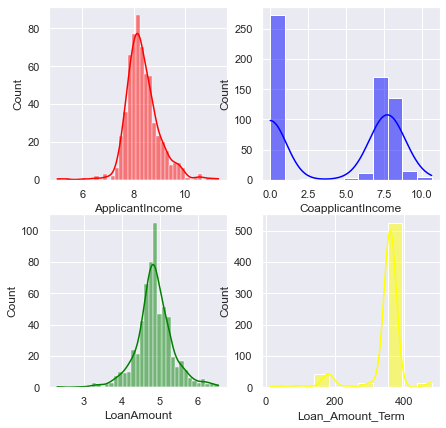

In [14]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(7,7))
sns.histplot(df['ApplicantIncome'], kde=True, ax=axs[0,0], color='red')
sns.histplot(df['CoapplicantIncome'], kde=True, ax=axs[0,1], color='blue')
sns.histplot(df['LoanAmount'], kde=True, ax=axs[1,0], color='green')
sns.histplot(df['Loan_Amount_Term'], kde=True, ax=axs[1,1], color='yellow')

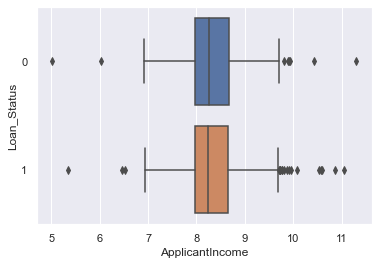

In [15]:
sns.boxplot(x=df['ApplicantIncome'], y=df['Loan_Status'].astype("category"))
plt.show()

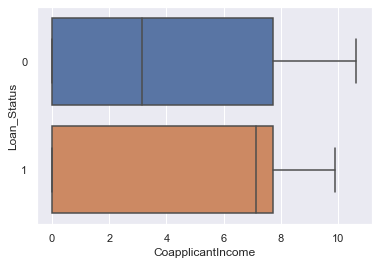

In [16]:
sns.boxplot(x=df['CoapplicantIncome'], y=df['Loan_Status'].astype("category"))
plt.show()

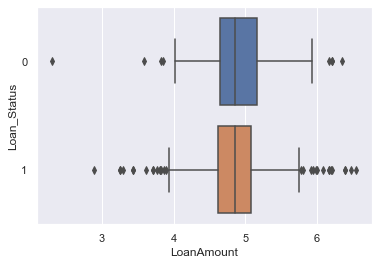

In [17]:
sns.boxplot(x=df['LoanAmount'], y=df['Loan_Status'].astype("category"))
plt.show()

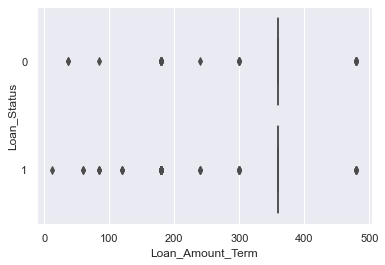

In [18]:
sns.boxplot(x=df['Loan_Amount_Term'], y=df['Loan_Status'].astype("category"))
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Loan_Status'], axis=1),
    df['Loan_Status'],
    test_size=0.25,
    random_state=0)

In [20]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info_acc=np.zeros(13)
for i in range(0, 50):
    mutual_info = mutual_info_classif(X_train, y_train, random_state=i)
    mutual_info_acc = mutual_info_acc + mutual_info
mutual_info_acc = mutual_info_acc/50
mutual_info_acc

array([0.00585444, 0.00762448, 0.00743024, 0.01211729, 0.00696436,
       0.00104511, 0.0094059 , 0.        , 0.00972725, 0.14334689,
       0.00653619, 0.0115529 , 0.00571135])

In [21]:
mutual_info_acc = pd.Series(mutual_info_acc)
mutual_info_acc.index = X_train.columns
mutual_info_acc.sort_values(ascending=False)

Credit_History       0.143347
Education            0.012117
Semiurban            0.011553
Loan_Amount_Term     0.009727
CoapplicantIncome    0.009406
Married              0.007624
Dependents           0.007430
Self_Employed        0.006964
Rural                0.006536
Gender               0.005854
Urban                0.005711
ApplicantIncome      0.001045
LoanAmount           0.000000
dtype: float64

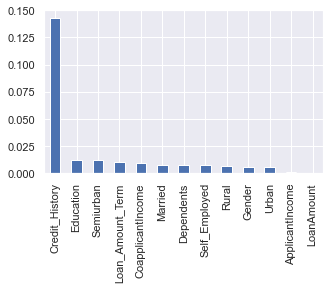

In [22]:
#let's plot the ordered mutual_info values per feature
mutual_info_acc.sort_values(ascending=False).plot.bar(figsize=(5, 3))
plt.show()

In [23]:
#X_train['ApplicantIncome'] = (X_train['ApplicantIncome']-X_train['ApplicantIncome'].mean())/X_train['ApplicantIncome'].std()
#X_test['ApplicantIncome'] = (X_test['ApplicantIncome']-X_train['ApplicantIncome'].mean())/X_train['ApplicantIncome'].std()
#X_train['CoapplicantIncome'] = (X_train['CoapplicantIncome']-X_train['CoapplicantIncome'].mean())/X_train['CoapplicantIncome'].std()
#X_test['CoapplicantIncome'] = (X_test['CoapplicantIncome']-X_train['CoapplicantIncome'].mean())/X_train['CoapplicantIncome'].std()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train.values)
scaled_test = scaler.transform(X_test.values)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)
print(y_train.value_counts())
print(y_test.value_counts())
X_train

1    332
0    159
Name: Loan_Status, dtype: int64
1    90
0    33
Name: Loan_Status, dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
90,1.0,1.0,0.000000,1.0,0.0,0.473406,0.749501,0.607121,0.729730,0.5,0.0,1.0,0.0
533,1.0,0.0,0.333333,1.0,0.0,0.685915,0.000000,0.701335,0.729730,1.0,0.0,1.0,0.0
452,1.0,1.0,0.000000,1.0,0.0,0.519327,0.701123,0.637200,0.729730,0.0,1.0,0.0,0.0
355,0.0,0.0,0.000000,1.0,0.0,0.513793,0.000000,0.578737,0.324324,0.5,0.0,0.0,1.0
266,1.0,1.0,0.666667,1.0,0.0,0.547333,0.680200,0.638763,0.729730,0.5,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,1.0,1.0,0.000000,1.0,0.0,0.481018,0.674115,0.492212,0.729730,0.5,0.0,0.0,1.0
9,1.0,1.0,0.333333,1.0,0.0,0.706960,0.874532,0.836568,0.729730,0.5,0.0,1.0,0.0
359,1.0,1.0,1.000000,1.0,0.0,0.562132,0.757778,0.706065,0.729730,0.5,0.0,1.0,0.0
192,1.0,1.0,0.000000,0.0,0.0,0.586782,0.000000,0.653852,0.729730,0.5,0.0,0.0,1.0


In [30]:
# Logistic Regression 1
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=100).fit(X_train,y_train)
print(log_model.score(X_train,y_train))
print(log_model.score(X_test,y_test))

0.8044806517311609
0.8292682926829268


In [31]:
# Logistic Regression 2
from sklearn.linear_model import LogisticRegression
log_model2 = LogisticRegression(penalty='l1', solver='liblinear', C=0.5).fit(X_train,y_train)
print(log_model2.score(X_train,y_train))
print(log_model2.score(X_test,y_test))
print(log_model2.coef_, log_model2.intercept_)

0.8044806517311609
0.8292682926829268
[[ 0.          0.13040115  0.          0.17233767  0.          0.
   0.0101424  -0.40800862 -0.26353473  3.90445461 -0.63325542  0.
  -0.40226905]] [-0.42917049]


In [32]:
from sklearn.tree import DecisionTreeClassifier
print('Decision Tree Classifier:')
for i in range(1,6):
    tree_model = DecisionTreeClassifier(max_depth=i)
    tree_model.fit(X_train, y_train)
    print(f'max_depth = {i},',' accuracy=',tree_model.score(X_test, y_test))

Decision Tree Classifier:
max_depth = 1,  accuracy= 0.8292682926829268
max_depth = 2,  accuracy= 0.7967479674796748
max_depth = 3,  accuracy= 0.8048780487804879
max_depth = 4,  accuracy= 0.8048780487804879
max_depth = 5,  accuracy= 0.8048780487804879


In [33]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
print('Random Forest Classifier:')
for i in range(1,6):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(X_train, y_train)
    print(f'max_depth = {i},',' accuracy=',clf.score(X_test, y_test, sample_weight=None))

Random Forest Classifier:
max_depth = 1,  accuracy= 0.7479674796747967
max_depth = 2,  accuracy= 0.8130081300813008
max_depth = 3,  accuracy= 0.8292682926829268
max_depth = 4,  accuracy= 0.8292682926829268
max_depth = 5,  accuracy= 0.8292682926829268


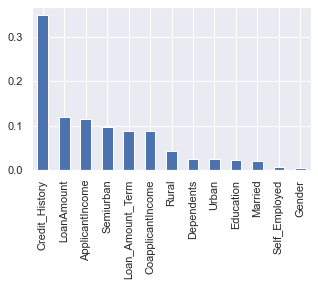

In [34]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
feature_imp_random = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False).plot.bar(figsize=(5,3))
plt.show()

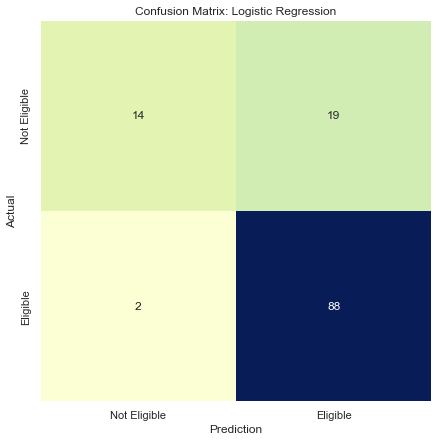

In [43]:
# Confusion Matrix of Simple Logistic Regression:
from sklearn.metrics import confusion_matrix, classification_report
pred1=log_model.predict(X_test)
cm = confusion_matrix(y_test, pred1, labels=[0,1])
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='YlGnBu', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['Not Eligible', 'Eligible'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Eligible', 'Eligible'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

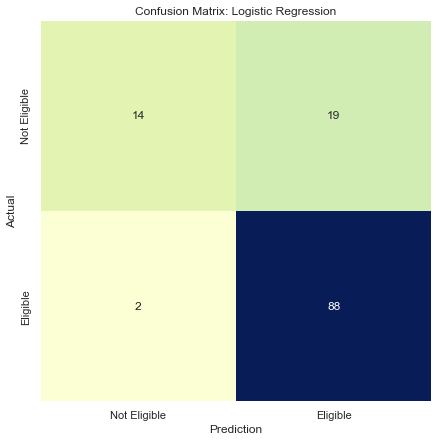

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
pred2=clf.predict(X_test)
cm = confusion_matrix(y_test, pred2, labels=[0,1])
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='YlGnBu', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['Not Eligible', 'Eligible'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Eligible', 'Eligible'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

#### Both logistic regression and random forest achieved 83% accuracy and good precision. When our models predict a certain customer is eligible/ not eligible for loan, it is very likely that the custom actually are eligible/ not eligible for loan.